In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [51]:
all_features = pd.read_csv('features_all.csv')

tdes = all_features[all_features['data_origin']=='tdes_ztf']
tns = all_features[all_features['data_origin']=='tns']
simbad = all_features[all_features['data_origin']=='simbad']


In [52]:
tdes.r_chisq.describe()

count    737.000000
mean      14.849534
std       37.205512
min        0.090078
25%        0.366573
50%        0.688265
75%        3.583688
max      316.040294
Name: r_chisq, dtype: float64

In [53]:
simbad.r_chisq.describe()

count    223968.000000
mean        114.094599
std         537.827035
min           0.000005
25%          12.944705
50%          36.160300
75%          93.822239
max      102525.758526
Name: r_chisq, dtype: float64

In [54]:
tns.r_chisq.describe()

count    1703.000000
mean        9.329956
std        43.479996
min         0.000500
25%         0.349615
50%         0.882781
75%         3.209956
max      1120.838256
Name: r_chisq, dtype: float64

### Apply rchisq filter

In [55]:
rchisq_thresh = 10
all_features = all_features[all_features.r_chisq <= rchisq_thresh]

tdes = all_features[all_features['data_origin']=='tdes_ztf']
tns = all_features[all_features['data_origin']=='tns']
simbad = all_features[all_features['data_origin']=='simbad']

### Plot

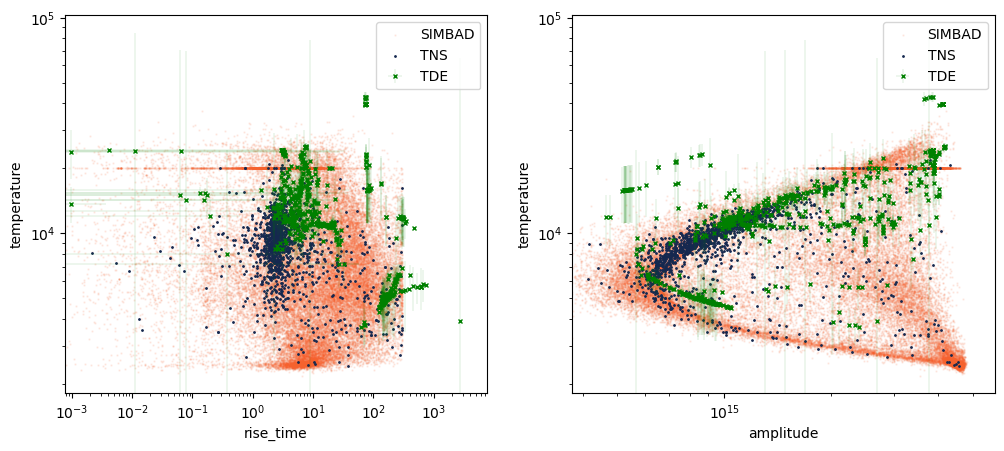

In [56]:
colors = ['#F5622E', '#15284F', "green"]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.scatter(simbad['rise_time'], simbad['temperature'], label='SIMBAD', c=colors[0] , alpha=0.1, s=0.5)
ax1.scatter(tns['rise_time'], tns['temperature'], label='TNS', c=colors[1], s=1)
ax1.errorbar(tdes['rise_time'], tdes['temperature'], yerr = tdes['err_temperature'], xerr = tdes['err_rise_time'],
            elinewidth = 0.1, fmt = 'x', label = 'TDE', c = colors[2], markersize = 3)

ax1.set_xlabel('rise_time')
ax1.set_ylabel('temperature')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(left = 0.8 * np.min(tdes['rise_time']))
ax1.legend()

ax2.scatter(simbad['amplitude'], simbad['temperature'], label='SIMBAD', c=colors[0] , alpha=0.1, s=0.5)
ax2.scatter(tns['amplitude'], tns['temperature'], label='TNS', c=colors[1], s=1)
ax2.errorbar(tdes['amplitude'], tdes['temperature'], yerr = tdes['err_temperature'], xerr = tdes['err_amplitude'],
            elinewidth = 0.1, fmt = 'x', label = 'TDE', c = colors[2], markersize = 3)

ax2.set_xlabel('amplitude')
ax2.set_ylabel('temperature')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlim(left = 0.8 * np.min(tdes['amplitude']))
ax2.legend()


